## Importação de Bibliotecas

In [45]:
# Python versão 3.8.8
# Windows 10

# biblioteca para interação com o sistema
import os
import shutil

# biblioteca para manipulação de dados
import pandas as pd # versão 1.3.2
import numpy as np

# biblioteca para manipulação de banco de dados sqlite
import sqlite3 # versão 2.6.0
from sqlite3 import Error

import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

import matplotlib.pyplot as plt

## Variáveis Globais

In [2]:
path_atual = os.path.dirname(os.path.realpath('__file__')) + "\\" # diretório onde se encontra o script
nome_bd = "COVID_MG_DW.sqlite"

## Conexão Banco de Dados

In [3]:
def nova_conexao(path, nome_bd):

    conec_bd = None
    try:
        conec_bd = sqlite3.connect(path + nome_bd)

    except Error as erro:
        print(erro)
        return 0
    
    finally:
        if conec_bd:
            conec_bd.close()
    return 1

In [4]:
if (nova_conexao(path_atual,  nome_bd)):
    conec_bd = sqlite3.connect(path_atual + nome_bd)
    cursor = conec_bd.cursor()
    print("Conexão ao banco '{}' criada com sucesso.".format(nome_bd))
    conec_bd.commit()

Conexão ao banco 'COVID_MG_DW.sqlite' criada com sucesso.


## Leitura de Dados

In [5]:
dim_municipio = pd.read_sql_query("SELECT * FROM Dim_Municipio", conec_bd)
dim_tempo = pd.read_sql_query("SELECT * FROM Dim_Tempo", conec_bd)
dim_paciente = pd.read_sql_query("SELECT * FROM Dim_Paciente", conec_bd)
dim_status_tratamento = pd.read_sql_query("SELECT * FROM Dim_Status_Tratamento", conec_bd)
fato_internacao = pd.read_sql_query("SELECT * FROM Fato_Internacao", conec_bd)

In [7]:
dim_paciente

,ID_PESSOA,GENERO,IDADE,FAIXA_ETARIA
0,378,FEMININO,60.0,60 A 69 ANOS
1,379,MASCULINO,21.0,20 A 29 ANOS
2,380,MASCULINO,64.0,60 A 69 ANOS
3,381,MASCULINO,71.0,70 A 79 ANOS
4,382,MASCULINO,40.0,40 A 49 ANOS
...,...,...,...,...
962243,2042891,FEMININO,87.0,80 A 89 ANOS
962244,2042892,FEMININO,84.0,80 A 89 ANOS
962245,2042893,FEMININO,77.0,70 A 79 ANOS
962246,2042894,FEMININO,82.0,80 A 89 ANOS


## Análises

### Análise Correlação Gênero - Obito

In [8]:
dados_paciente = pd.merge(fato_internacao, dim_paciente, how="inner", on=["ID_PESSOA"])

In [9]:
dados_paciente = pd.merge(dados_paciente, dim_status_tratamento, how="inner", on=["ID_PESSOA"])

In [10]:
dados_paciente.head(2)

,ID_PESSOA,ID_MUNICIPIO,ID_TEMPO,GENERO,IDADE,FAIXA_ETARIA,DIAS_PRA_NOTIFICACAO,EVOLUCAO,INTERNACAO,UTI
0,378,310710.0,2020-03-11 00:00:00,FEMININO,60.0,60 A 69 ANOS,6,RECUPERADO,SIM,SIM
1,379,310620.0,2020-03-10 00:00:00,MASCULINO,21.0,20 A 29 ANOS,7,RECUPERADO,SIM,SIM


In [10]:
dados_paciente.columns

Index(['ID_paciente', 'ID_Tempo', 'ID_Municipio', 'Obito', 'Genero', 'Idade'], dtype='object')

<AxesSubplot:xlabel='GENERO', ylabel='count'>

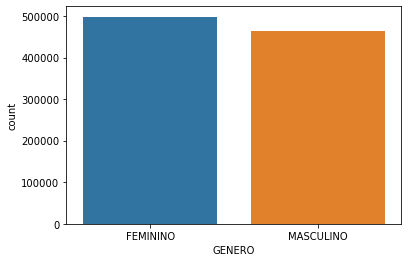

In [11]:
sns.countplot(data = dados_paciente, x="GENERO")

<AxesSubplot:xlabel='INTERNACAO', ylabel='Count'>

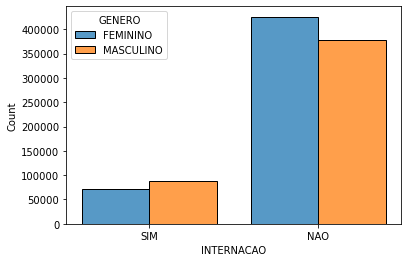

In [20]:
sns.histplot(data=dados_paciente, x="INTERNACAO", hue="GENERO", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='UTI', ylabel='Count'>

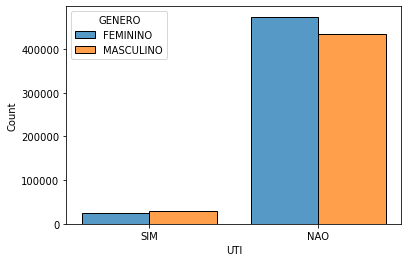

In [21]:
sns.histplot(data=dados_paciente, x="UTI", hue="GENERO", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='EVOLUCAO', ylabel='Count'>

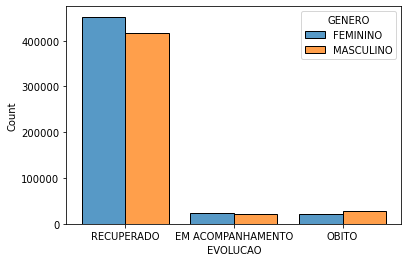

In [23]:
sns.histplot(data=dados_paciente, x="EVOLUCAO", hue="GENERO", multiple="dodge", shrink=.8)

### Análise Idade

In [25]:
dados_paciente.IDADE = dados_paciente.IDADE.astype(int)

<AxesSubplot:xlabel='IDADE', ylabel='Count'>

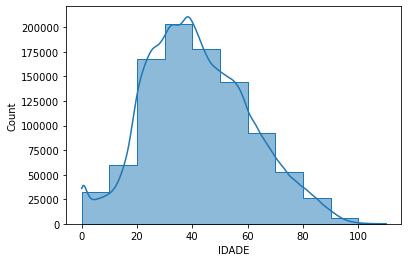

In [27]:
sns.histplot(data = dados_paciente, x="IDADE", bins = 10, binwidth=10, element="step", kde = True)

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

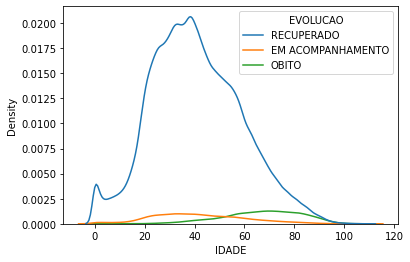

In [30]:
sns.kdeplot(data=dados_paciente, x="IDADE", hue = "EVOLUCAO")

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

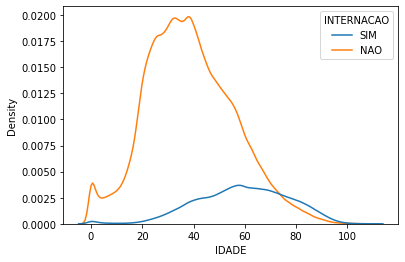

In [31]:
sns.kdeplot(data=dados_paciente, x="IDADE", hue = "INTERNACAO")

<AxesSubplot:xlabel='IDADE', ylabel='Density'>

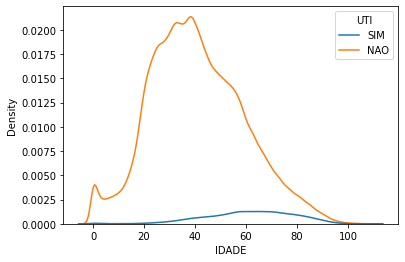

In [32]:
sns.kdeplot(data=dados_paciente, x="IDADE", hue = "UTI")

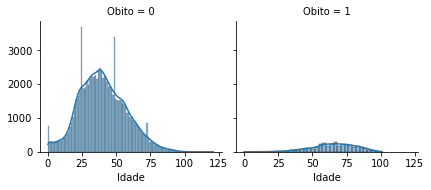

In [19]:
# plot = sns.FacetGrid(dados_paciente,col="Obito")
# plot = plot.map(sns.histplot, "Idade", kde=True)
# plot.fig.subplots_adjust(top=0.8)

In [33]:
# g = sns.catplot(x="Obito",y="Idade",data=dados_paciente,kind="bar", height = 6)

In [34]:
# dados_paciente[["Obito", "Idade"]].corr()

In [ ]:
# sns.kdeplot(data = dados_paciente, x="Obito", y="Idade", multiple="stack")

### Análise Faixa Etária

<AxesSubplot:xlabel='FAIXA_ETARIA', ylabel='count'>

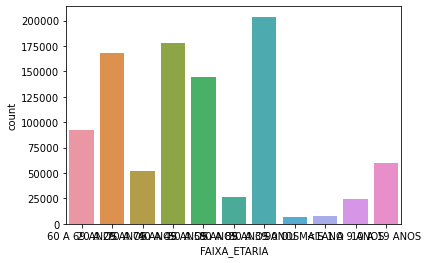

In [35]:
sns.countplot(data = dados_paciente, x="FAIXA_ETARIA")

<AxesSubplot:xlabel='INTERNACAO', ylabel='Count'>

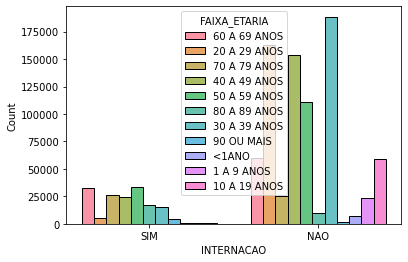

In [36]:
sns.histplot(data=dados_paciente, x="INTERNACAO", hue="FAIXA_ETARIA", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='UTI', ylabel='Count'>

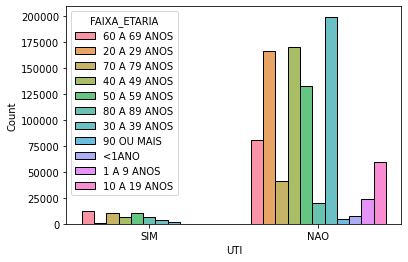

In [37]:
sns.histplot(data=dados_paciente, x="UTI", hue="FAIXA_ETARIA", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='EVOLUCAO', ylabel='Count'>

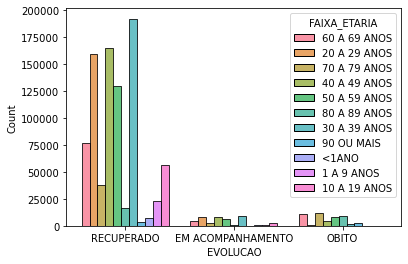

In [38]:
sns.histplot(data=dados_paciente, x="EVOLUCAO", hue="FAIXA_ETARIA", multiple="dodge", shrink=.8)

### Análise Micro Região

In [148]:
dados_municipios = pd.merge(dados_paciente, dim_municipio, how="inner", on=["ID_MUNICIPIO"])

In [149]:
dados_municipios["POPULAÇÃO_ESTIMADA"] = dados_municipios["POPULAÇÃO_ESTIMADA"].astype(int)

#### Casos

In [82]:
df_casos = dados_municipios.MACRO.value_counts().to_frame("Casos")

In [83]:
dados_macro = dados_municipios.drop_duplicates(subset = "MUNICIPIO_RESIDENCIA").reset_index()
df_pop = dados_macro.groupby(["MACRO"])["POPULAÇÃO_ESTIMADA"].sum().to_frame("Populacao")

In [88]:
df_macro = df_casos.join(df_pop).reset_index()

In [110]:
df_macro["Casos/Populacao"] = (df_macro.Casos/df_macro.Populacao * 100)

<AxesSubplot:xlabel='Casos', ylabel='index'>

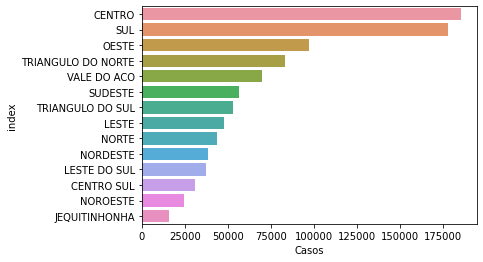

In [113]:
sns.barplot(x="Casos", y="index", data=df_macro)

<AxesSubplot:xlabel='Casos/Populacao', ylabel='index'>

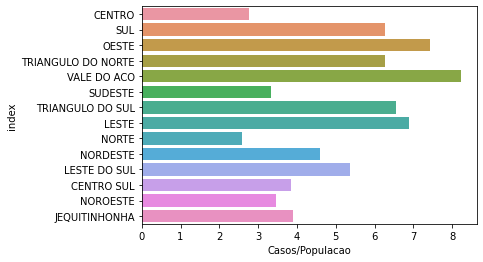

In [116]:
sns.barplot(x="Casos/Populacao", y="index", data=df_macro)

#### Obitos

In [150]:
dados_municipios.EVOLUCAO = np.where(dados_municipios.EVOLUCAO == "OBITO", 1, 0)

In [168]:
dados_macro_obitos = dados_municipios.groupby(["MACRO"])["EVOLUCAO"].sum().to_frame("Obitos")
dados_macro_populacao = dados_macro.groupby(["MACRO"])["POPULAÇÃO_ESTIMADA"].sum().to_frame("Populacao")

In [169]:
dados_macro_obtpop = dados_macro_obitos.join(dados_macro_populacao)
dados_macro_obtpop["Obitos/Populacao"] =  dados_macro_obtpop["Obitos"] / dados_macro_obtpop["Populacao"] 

In [171]:
dados_macro_obtcasos = dados_macro_obtpop.join(df_casos).reset_index()

<AxesSubplot:xlabel='Obitos', ylabel='MACRO'>

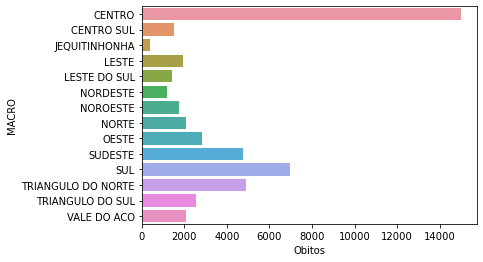

In [133]:
sns.barplot(x="Obitos", y="MACRO", data=dados_macro_obtpop)

<AxesSubplot:xlabel='Obitos/Populacao', ylabel='MACRO'>

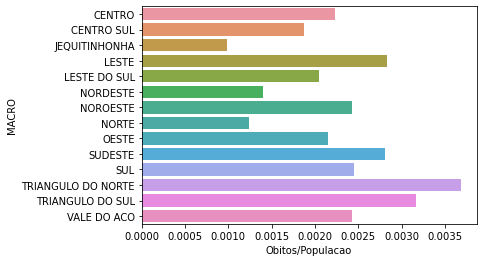

In [135]:
sns.barplot(x="Obitos/Populacao", y="MACRO", data=dados_macro_obtpop)

In [175]:
dados_macro_obtcasos["Obitos/Casos"] = dados_macro_obtcasos["Obitos"] / dados_macro_obtcasos["Casos"] 

In [176]:
dados_macro_obtcasos

,MACRO,Obitos,Populacao,Obitos/Populacao,Casos,Obitos/Casos
0,CENTRO,14974,6727252,0.002226,185346,0.080789
1,CENTRO SUL,1500,798326,0.001879,30693,0.048871
2,JEQUITINHONHA,400,408352,0.000980,15886,0.025179
3,LESTE,1959,693209,0.002826,47771,0.041008
4,LESTE DO SUL,1429,699214,0.002044,37510,0.038097
5,NORDESTE,1173,835346,0.001404,38427,0.030525
6,NOROESTE,1736,714167,0.002431,24784,0.070045
7,NORTE,2099,1700450,0.001234,43920,0.047791
8,OESTE,2819,1313161,0.002147,97492,0.028915
9,SUDESTE,4755,1693470,0.002808,56456,0.084225


#### Obitos/Casos

In [163]:
df_casos

,Casos
CENTRO,185346
SUL,177990
OESTE,97492
TRIANGULO DO NORTE,83037
VALE DO ACO,70075
SUDESTE,56456
TRIANGULO DO SUL,52861
LESTE,47771
NORTE,43920
NORDESTE,38427


In [164]:
dados_macro_obtcasos

,index,MACRO,Obitos,Populacao,Obitos/Populacao,Casos
0,0,CENTRO,14974,6727252,0.002226,NaN
1,1,CENTRO SUL,1500,798326,0.001879,NaN
2,2,JEQUITINHONHA,400,408352,0.000980,NaN
3,3,LESTE,1959,693209,0.002826,NaN
4,4,LESTE DO SUL,1429,699214,0.002044,NaN
5,5,NORDESTE,1173,835346,0.001404,NaN
6,6,NOROESTE,1736,714167,0.002431,NaN
7,7,NORTE,2099,1700450,0.001234,NaN
8,8,OESTE,2819,1313161,0.002147,NaN
9,9,SUDESTE,4755,1693470,0.002808,NaN


## Encerramento da Conexão com o Banco de dados

In [ ]:
conec_bd.close()